<a href="https://colab.research.google.com/github/MateusBampi/tcc-BIMASTER/blob/main/Treinando_modelo_do_zero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive')
workdir_path = '/content/drive/My Drive/MBA/PROJ/'
os.chdir(workdir_path)

Mounted at /content/drive


In [3]:
# arquivo com os labels correspondentes de cada imagem
label_df = pd.read_csv('labels.csv')
label_df.columns = ['id' , 'people']
label_df.head()

,id,people
0,1,35
1,2,41
2,3,41
3,4,44
4,5,41


In [4]:
# carregar as imagens como formato de vetores
img = np.load('images.npy')
img.shape

(2000, 480, 640, 3)

In [5]:
labels = np.array(label_df['people'])
labels

array([35, 41, 41, ..., 25, 26, 26])

In [6]:
# dividindo o dataset em treino e teste

x_train, x_test, y_train, y_test = train_test_split(img, labels, test_size=0.1)
print(x_train.shape[0])
print(x_test.shape[0])

1800
200


In [8]:
# criando modelo

model = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(64, (3,3), input_shape=(480,640,3), activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
    
])

model.compile(loss=tf.keras.losses.Huber(), optimizer=tf.keras.optimizers.Adam(), metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 478, 638, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 239, 319, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 237, 317, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 118, 158, 128)     0         
_________________________________________________________________
dropout (Dropout)            (None, 118, 158, 128)     0         
_________________________________________________________________
flatten (Flatten)            (None, 2386432)           0         
_________________________________________________________________
dense (Dense)                (None, 128)               3

In [9]:
lr_monitor = tf.keras.callbacks.LearningRateScheduler(
                lambda epochs : 1e-8 * 10 ** (epochs/20))

In [10]:
# treinando o modelo 

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=32, callbacks=[lr_monitor])

Epoch 1/50
57/57 [==============================] - 66s 563ms/step - loss: 11.8619 - mae: 12.3522 - val_loss: 7.5025 - val_mae: 7.9894
Epoch 2/50
57/57 [==============================] - 31s 536ms/step - loss: 11.0635 - mae: 11.5562 - val_loss: 6.7235 - val_mae: 7.2057
Epoch 3/50
57/57 [==============================] - 31s 545ms/step - loss: 10.7280 - mae: 11.2202 - val_loss: 6.7215 - val_mae: 7.2001
Epoch 4/50
57/57 [==============================] - 32s 553ms/step - loss: 10.7905 - mae: 11.2809 - val_loss: 6.3827 - val_mae: 6.8703
Epoch 5/50
57/57 [==============================] - 32s 562ms/step - loss: 10.0942 - mae: 10.5840 - val_loss: 6.2489 - val_mae: 6.7361
Epoch 6/50
57/57 [==============================] - 32s 566ms/step - loss: 9.8506 - mae: 10.3407 - val_loss: 5.9327 - val_mae: 6.4143
Epoch 7/50
57/57 [==============================] - 32s 563ms/step - loss: 9.2724 - mae: 9.7609 - val_loss: 5.7479 - val_mae: 6.2355
Epoch 8/50
57/57 [==============================] - 32s 56

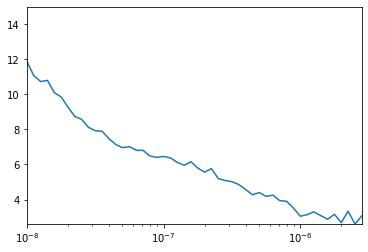

In [11]:
# plot mae
plt.semilogx(history.history['lr'], history.history['loss'])
plt.axis([np.min(history.history['lr']), np.max(history.history['lr']), np.min(history.history['loss']), 15])
plt.show()

In [12]:
np.max(history.history['lr'])

2.8183829e-06

In [13]:
# mudando a learning rate para 1e-6

model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(lr=1e-6), metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 478, 638, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 239, 319, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 237, 317, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 118, 158, 128)     0         
_________________________________________________________________
dropout (Dropout)            (None, 118, 158, 128)     0         
_________________________________________________________________
flatten (Flatten)            (None, 2386432)           0         
_________________________________________________________________
dense (Dense)                (None, 128)               3

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [14]:
# treinando o modelo novamente

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=32)

Epoch 1/100
57/57 [==============================] - 33s 565ms/step - loss: 16.3902 - mae: 3.1442 - val_loss: 7.1811 - val_mae: 2.0236
Epoch 2/100
57/57 [==============================] - 32s 565ms/step - loss: 10.5921 - mae: 2.5891 - val_loss: 6.2941 - val_mae: 1.8679
Epoch 3/100
57/57 [==============================] - 32s 562ms/step - loss: 9.6804 - mae: 2.4288 - val_loss: 8.4377 - val_mae: 2.3696
Epoch 4/100
57/57 [==============================] - 32s 564ms/step - loss: 11.5561 - mae: 2.7019 - val_loss: 6.5376 - val_mae: 2.0150
Epoch 5/100
57/57 [==============================] - 32s 563ms/step - loss: 9.4776 - mae: 2.4683 - val_loss: 5.4034 - val_mae: 1.7087
Epoch 6/100
57/57 [==============================] - 32s 562ms/step - loss: 9.7107 - mae: 2.4907 - val_loss: 5.3018 - val_mae: 1.6815
Epoch 7/100
57/57 [==============================] - 32s 563ms/step - loss: 8.9840 - mae: 2.3612 - val_loss: 5.0055 - val_mae: 1.6603
Epoch 8/100
57/57 [==============================] - 32s 56

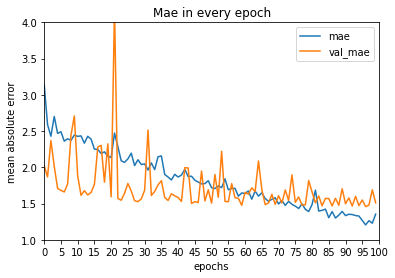

In [61]:
# plot mae
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.legend(['mae', 'val_mae'])
plt.ylim(1, 4)
plt.xlim(0, 50)

plt.xticks(np.arange(0,105, 5))

plt.xlabel('epochs')
plt.ylabel('mean absolute error')
plt.title('Mae in every epoch')
plt.show()

In [58]:
# fazendo inferência nas 9 primeiras imagens

previsao = np.round(model.predict(x_train[0:9]))

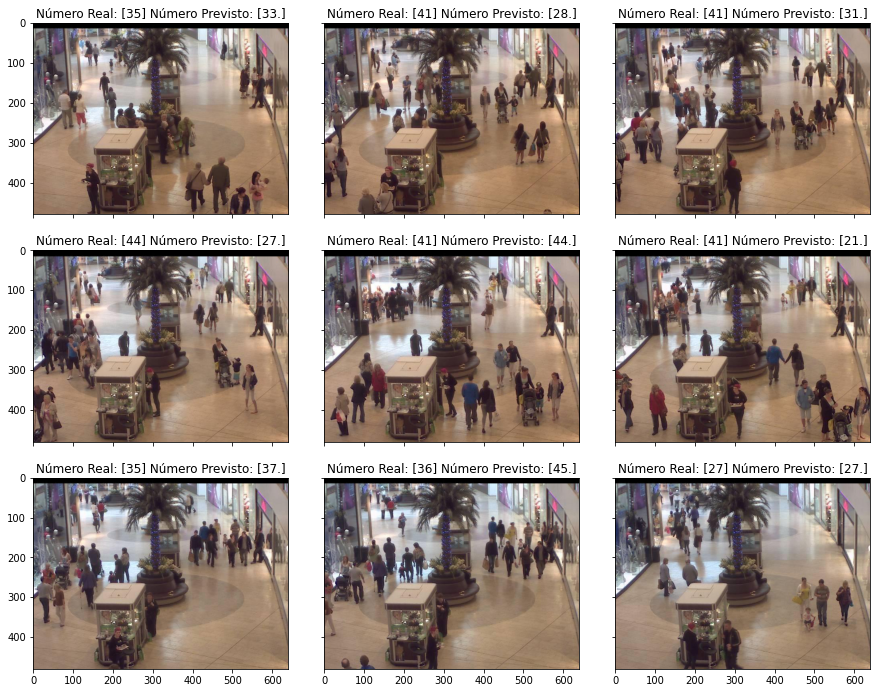

In [62]:
# plotando as imagens, o valor real e o valor de inferencia

fig = plt.figure(figsize=(15,15))
grid = ImageGrid(
        fig, 111,
        nrows_ncols=(3,3),
        axes_pad=0.5
)

for x in range(0,9):
    
    grid[x].set_title('Número Real: [' + str(labels[x]) + '] Número Previsto: ' + str(previsao[x]))
    grid[x].imshow(img[x])

In [20]:
# salvar o modelo, os pesos, a configuracao de treinamento (loss, optimizer) e o estado do otimizador caso queira
# continuar o treinamento de onde parou

model.save('modelo_contador.h5')